# Visualización

Para esta visualización se utiliza el set de datos "Estimación_Tasa_de_Abortos.csv", el cual presenta una estimación modelada del índice de abortos por cada 1000 mujeres en edad reproductiva (15-49 años) en diferentes países del mundo. En primer lugar importamos las librerías neceesarias y abrimos el dataset:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base64

tasas_de_aborto_path = 'Estimación_Tasa_de_Abortos.csv'
tasas_de_aborto = pd.read_csv(tasas_de_aborto_path)
tasas_de_aborto.head()

,ParentLocation,SpatialDimValueCode,Location,FactValueNumericLow_80,FactValueNumericHigh_80,Value_80,FactValueNumericLow_95,FactValueNumericHigh_95,Value_95
0,Europe,POL,Poland,6,20,10,4,28,10
1,Europe,BGR,Bulgaria,9,11,10,9,12,10
2,Europe,LVA,Latvia,9,11,10,9,12,10
3,Europe,BLR,Belarus,9,12,10,9,12,10
4,Europe,NOR,Norway,11,11,11,10,11,11


Los datos contenidos en este set permiten realizan un análisis relativamente directo al mostrarnos datos unidimensionales concretos sonre cada país. Por esta razón, se decide construir gráficos de barras que permitan visualizar ciertas métricas. Partiremos por mostrar los 10 paises con la mayor tasa de abortos:

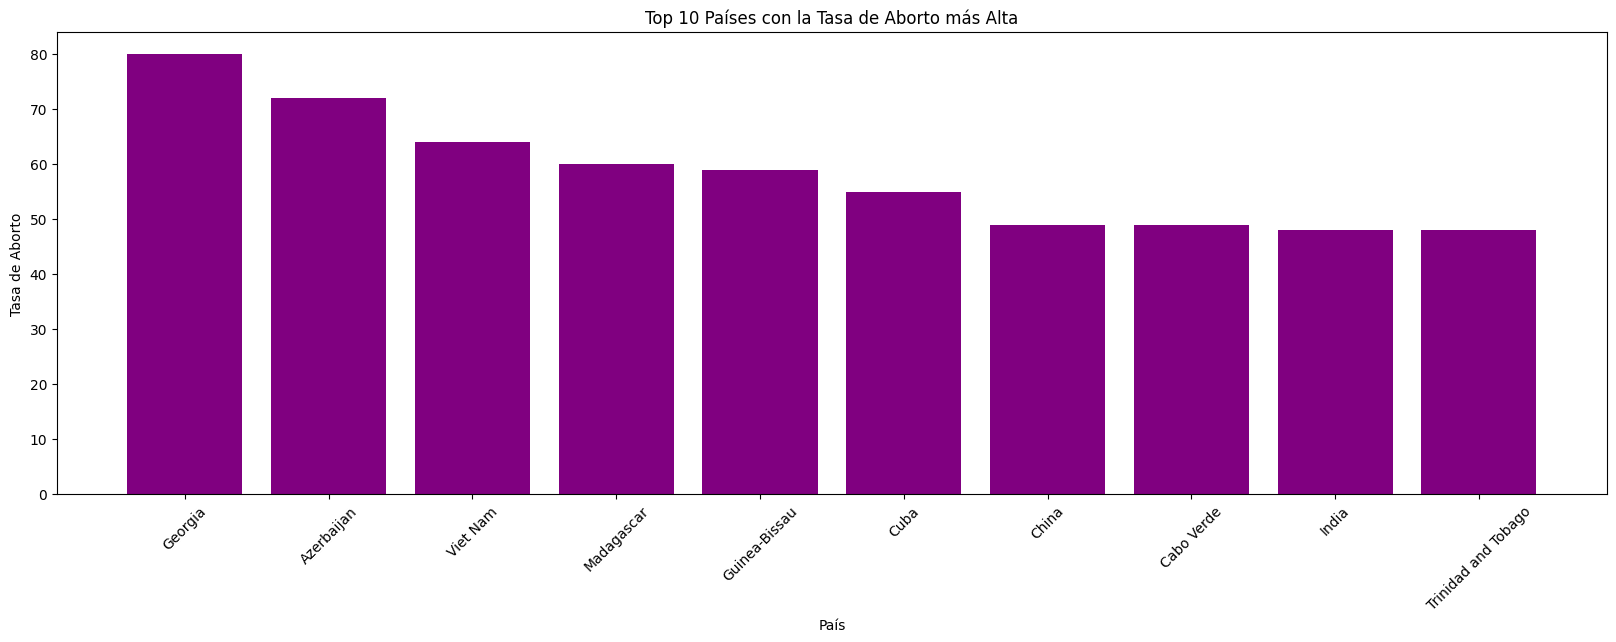

In [6]:
top_10_paises_altos = tasas_de_aborto.sort_values('Value_95', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(top_10_paises_altos['Location'], top_10_paises_altos['Value_95'], color='purple')  # Change the color to red
ax.set_xlabel('País')
ax.set_ylabel('Tasa de Aborto')
ax.set_title('Top 10 Países con la Tasa de Aborto más Alta')
plt.xticks(rotation=45)
plt.show()

Para poder realizar una comparación de valor, se procede a mostrar también los países con la menor tasa de abortos:

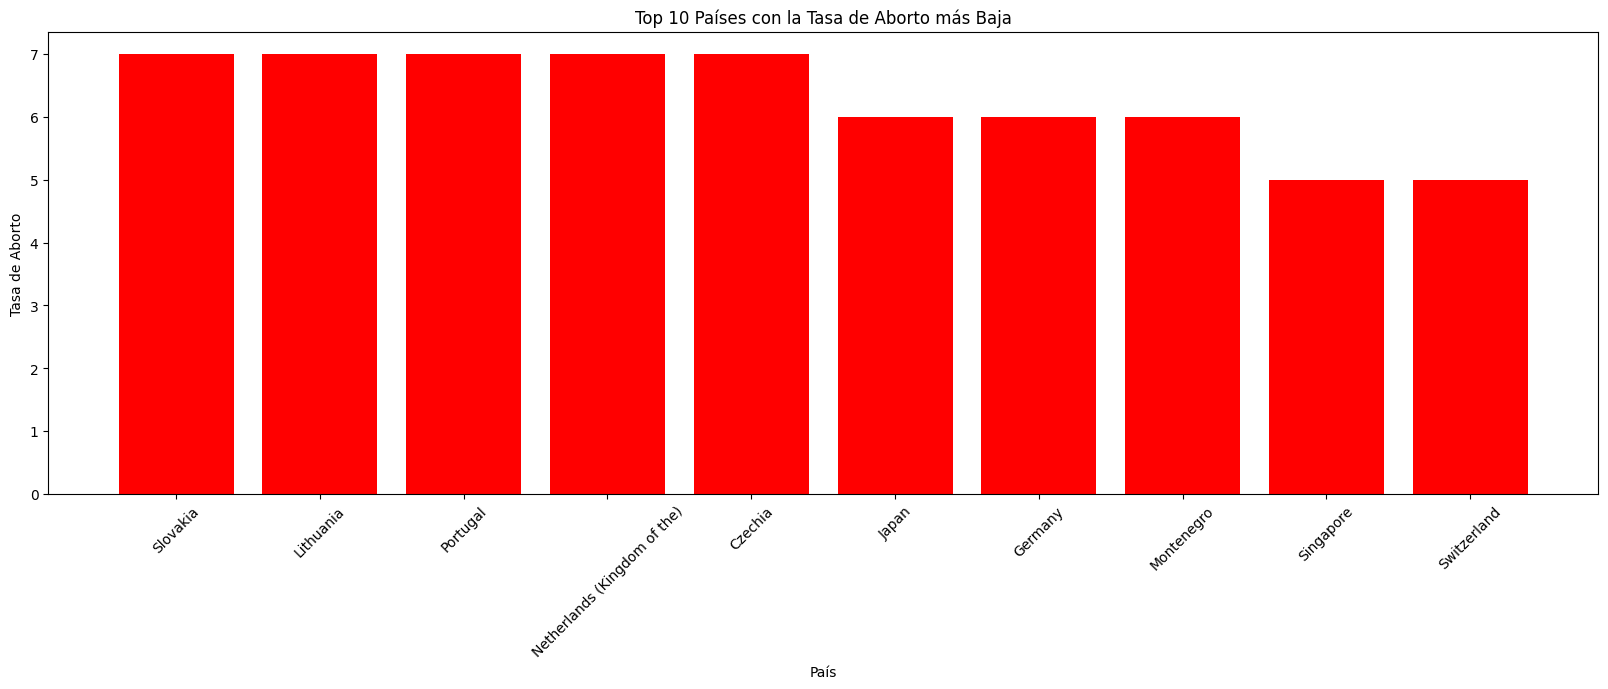

In [5]:
top_10_paises_bajos = tasas_de_aborto.sort_values('Value_95').head(10).sort_values('Value_95', ascending=False)

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(top_10_paises_bajos['Location'], top_10_paises_bajos['Value_95'], color='red')
ax.set_xlabel('País')
ax.set_ylabel('Tasa de Aborto')
ax.set_title('Top 10 Países con la Tasa de Aborto más Baja')
plt.xticks(rotation=45)
plt.show()

Finalmente, para poder comparar la la desigualdad entre los países con mayor y menor tasas de aborto, juntamos ambas visualizaciones en una sola:

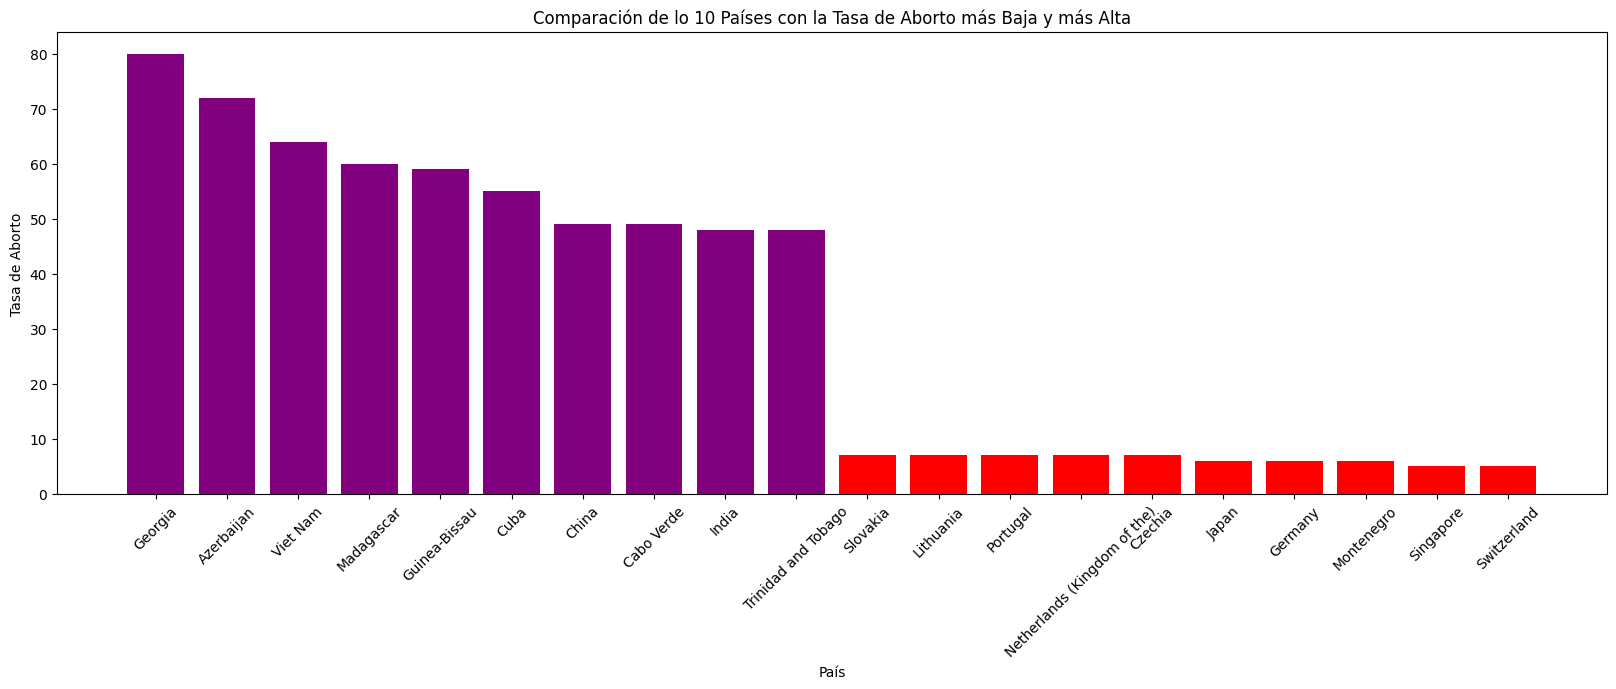

In [12]:
top_10_paises = pd.concat([top_10_paises_altos, top_10_paises_bajos.sort_values('Value_95', ascending=False)])

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(top_10_paises['Location'], top_10_paises['Value_95'], color=['purple']*10 + ['red']*10)  
ax.set_xlabel('País')
ax.set_ylabel('Tasa de Aborto')
ax.set_title('Comparación de lo 10 Países con la Tasa de Aborto más Baja y más Alta')
plt.xticks(rotation=45)
plt.show()

Finalmente, guardamos la visualización tanto en formato png como html:

In [15]:
fig.savefig('Paises_Mayor_&_Menor_Tasa_de_Aborto.png')
with open('Paises_Mayor_&_Menor_Tasa_de_Aborto.png', 'rb') as f:
    img_data = f.read()
img_base64 = base64.b64encode(img_data).decode('utf-8')
html = f'<img src="data:image/png;base64,{img_base64}">'
with open('Paises_Mayor_&_Menor_Tasa_de_Aborto.html', 'w') as file:
    file.write(html)